# Clustering Wine Reviews

DS 5001 Text as Data

In [9]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_hone = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [10]:
import sys
sys.path.append(local_lib)
from hac2 import HAC

In [11]:
import pandas as pd
import numpy as np

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [16]:
DOC = pd.read_csv(f"{data_hone}/winereviews/winereviews-LIB.csv", sep="|").set_index("doc_id")

In [80]:
DOC.head()

,doc_key,doc_title,doc_label,doc_province,doc_points,doc_price,doc_content,doc_original,doc_variety,doc_taster,doc_place,token_count,doc_sentiment_polarity,doc_sentiment_subjectivity,doc_prince_20,doc_prine_20,doc_price_20
doc_id,,,,,,,,,,,,,,,,,
0,0,0: Nicosia 2013 Vulk Bianco (Etna) Vulk Bianc...,Italy,Sicily & Sardinia,87,NaN,"Aromas include tropical fruit, broom, brimston...","Aromas include tropical fruit, broom, brimston...",White Blend,Kerin OKeefe,Italy Sicily & Sardinia Etna,20,0.1,0.73,NaN,NaN,NaN
1,1,1: Quinta dos Avidagos 2011 Avidagos Red (Dour...,Portugal,Douro,87,15.0,"This is ripe and fruity, a wine that is smooth...","This is ripe and fruity, a wine that is smooth...",Portuguese Red,Roger Voss,Portugal Douro,19,0.2,0.46,"(0.704, 168.8]","(0.704, 168.8]","(0.704, 168.8]"
2,2,2: Rainstorm 2013 Pinot Gris (Willamette Valle...,US,Oregon,87,14.0,"Tart and snappy, the flavors of lime flesh and...","Tart and snappy, the flavors of lime flesh and...",Pinot Gris,Paul Gregutt,US Oregon Willamette Valley Willamette Valley,16,0.0,0.36,"(0.704, 168.8]","(0.704, 168.8]","(0.704, 168.8]"
3,3,3: St. Julian 2013 Reserve Late Harvest Riesli...,US,Michigan,87,13.0,"Pineapple rind, lemon pith and orange blossom ...","Pineapple rind, lemon pith and orange blossom ...",Riesling,Alexander Peartree,US Michigan Lake Michigan Shore,20,0.2,0.33,"(0.704, 168.8]","(0.704, 168.8]","(0.704, 168.8]"
4,4,4: Sweet Cheeks 2012 Vintner's Reserve Wild Ch...,US,Oregon,87,65.0,"Much like the regular bottling from 2012, this...","Much like the regular bottling from 2012, this...",Pinot Noir,Paul Gregutt,US Oregon Willamette Valley Willamette Valley,22,0.3,0.45,"(0.704, 168.8]","(0.704, 168.8]","(0.704, 168.8]"


In [56]:
# DOC['doc_price_20'] = pd.cut(DOC.doc_price, 20)

In [29]:
tfidf_engine = TfidfVectorizer(
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 4000,
    norm = 'l2', 
    use_idf = True)

In [30]:
X = tfidf_engine.fit_transform(DOC.doc_content)

In [32]:
TFIDF = pd.DataFrame(X.toarray(), columns=tfidf_engine.get_feature_names_out(), index=DOC.index)

In [33]:
TFIDF

,000,000 cases,10,10 cabernet,10 merlot,10 years,100,100 cabernet,100 varietal,11,...,youthfully,zest,zestiness,zesty,zesty acidity,zesty lemon,zin,zinfandel,zingy,zippy
doc_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
def cluster_by_feature(fname):
    X = TFIDF.join(DOC[fname], how='inner').groupby(fname).mean()
    hac = HAC(X.dropna())
    hac.plot()

<Figure size 640x480 with 0 Axes>

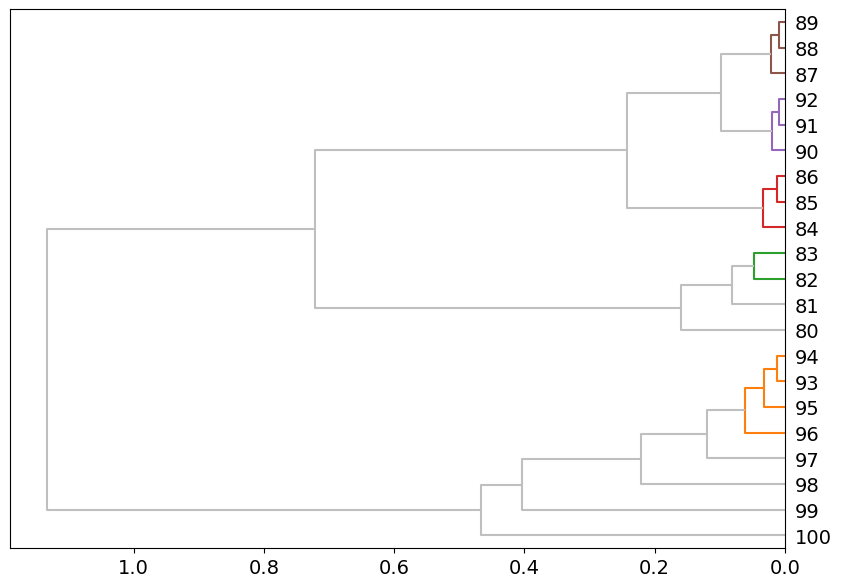

In [76]:
cluster_by_feature('doc_points')

<Figure size 640x480 with 0 Axes>

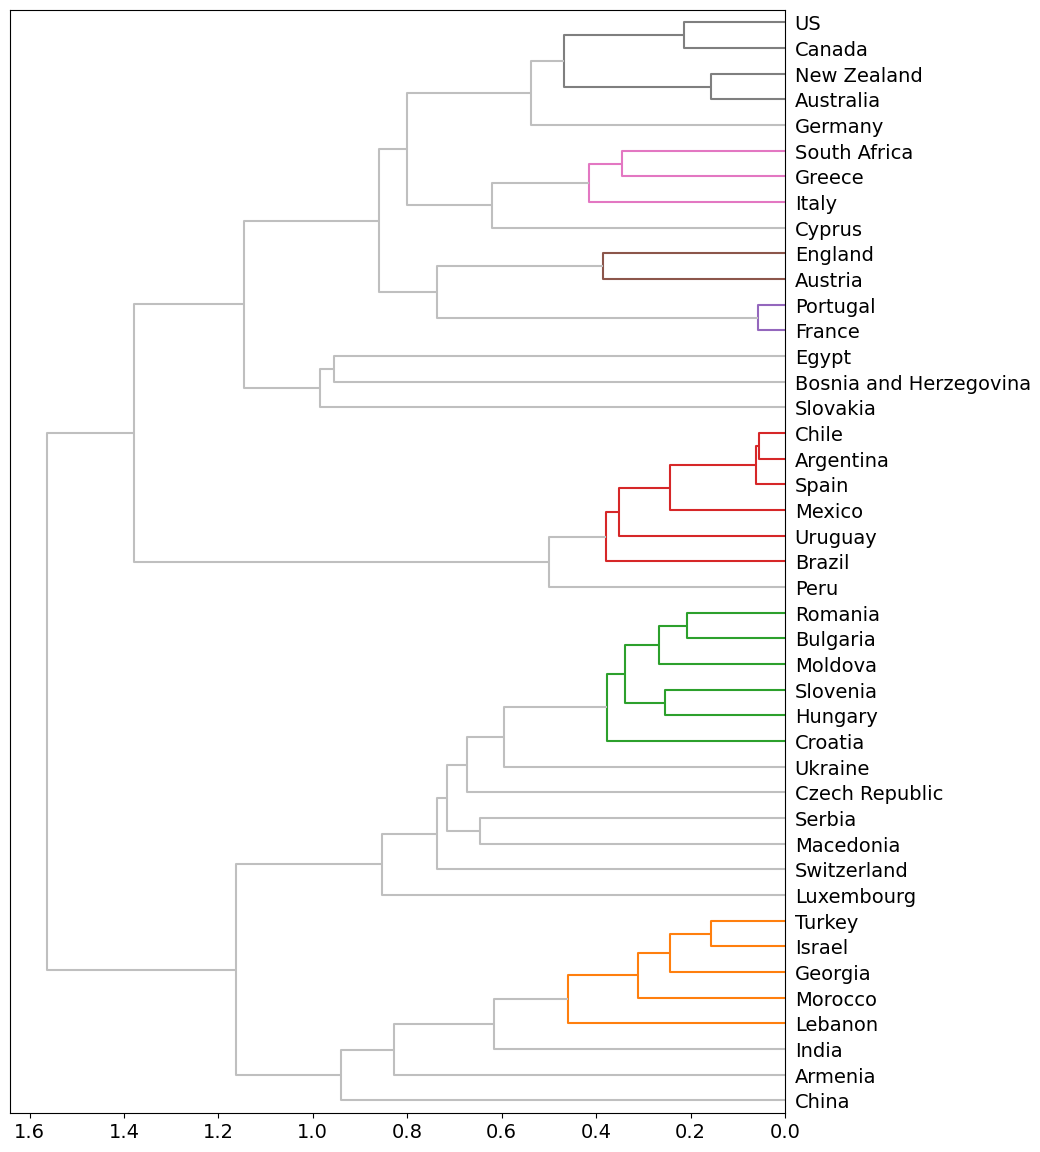

In [77]:
cluster_by_feature('doc_label')

<Figure size 640x480 with 0 Axes>

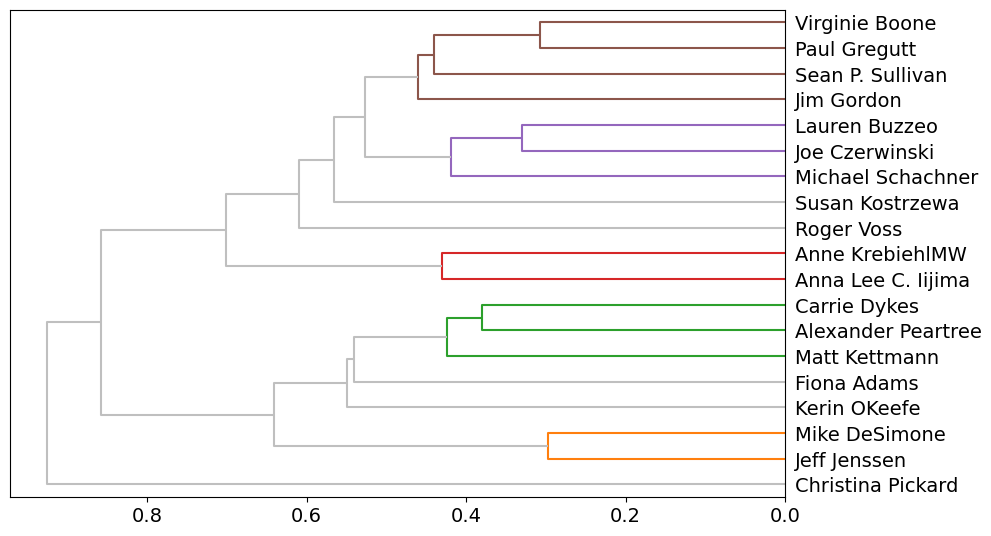

In [78]:
cluster_by_feature('doc_taster')